In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

In [22]:
# study data files
an_wage_path = "data/oecd_av_wage_1990 - 2021_annual_au_us.csv"
cpi_path = "data/oecd_cpi.csv"

# making dataframes
an_wage_df = pd.read_csv(an_wage_path)
cpi_df = pd.read_csv(cpi_path)

# drop unwanted rows
clean_an_wage_df = an_wage_df.iloc[0:64]

# drop unwanted columns
selected_columns = ['Country', 'Time', 'Unit Code', 'Value']

clean_an_wage_df = clean_an_wage_df[selected_columns]
clean_cpi_df = cpi_df[selected_columns]

# change column name
clean_an_wage_df = clean_an_wage_df.rename(columns={'Value':'Annual Wage(Avg.)'})
clean_cpi_df = clean_cpi_df.rename(columns={'Value':'CPI'})

# merge dataframes
dataset = pd.merge(clean_an_wage_df, clean_cpi_df, on=['Country', 'Time'])

# remove decimal of Annual Wage column 
dataset.loc[:,'Annual Wage(Avg.)'] = dataset.loc[:,'Annual Wage(Avg.)'].astype(int)

au_df = dataset.loc[dataset['Country'] == 'Australia']
us_df = dataset.loc[dataset['Country'] == 'United States']

print(dataset.to_string())

          Country  Time Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI
0       Australia  1990         AUD              33030          PC  7.333022
1       Australia  1991         AUD              34096          PC  3.176675
2       Australia  1992         AUD              35438          PC  1.012231
3       Australia  1993         AUD              36516          PC  1.753653
4       Australia  1994         AUD              37344          PC  1.969635
5       Australia  1995         AUD              38243          PC  4.627767
6       Australia  1996         AUD              40124          PC  2.615385
7       Australia  1997         AUD              41921          PC  0.224887
8       Australia  1998         AUD              43097          PC  0.860135
9       Australia  1999         AUD              44579          PC  1.483129
10      Australia  2000         AUD              46246          PC  4.457435
11      Australia  2001         AUD              48315          PC  4.407135

In [18]:
# Calculate Relative Cumulative CPI since 1990 (assuming cumulative CPI in 1990 = 7.333022)

# AU
au_CPI_sr = au_df.loc[:,"CPI"].astype(float)
CPI_cumu_list1 = []
total1 = 0
for i in au_CPI_sr:
    total1 += i
    CPI_cumu_list1.append(total1)
au_df["CPI Cumulative"] = CPI_cumu_list1
print(au_df)

# US
us_CPI_sr = us_df.loc[:,"CPI"].astype(float)
CPI_cumu_list2 = []
total2 = 0
for i in us_CPI_sr:
    total2 += i
    CPI_cumu_list2.append(total2)
us_df["CPI Cumulative"] = CPI_cumu_list2
print(us_df)

      Country  Time Unit Code_x  Annual Wage(Avg.) Unit Code_y       CPI  \
0   Australia  1990         AUD              33030          PC  7.333022   
1   Australia  1991         AUD              34096          PC  3.176675   
2   Australia  1992         AUD              35438          PC  1.012231   
3   Australia  1993         AUD              36516          PC  1.753653   
4   Australia  1994         AUD              37344          PC  1.969635   
5   Australia  1995         AUD              38243          PC  4.627767   
6   Australia  1996         AUD              40124          PC  2.615385   
7   Australia  1997         AUD              41921          PC  0.224887   
8   Australia  1998         AUD              43097          PC  0.860135   
9   Australia  1999         AUD              44579          PC  1.483129   
10  Australia  2000         AUD              46246          PC  4.457435   
11  Australia  2001         AUD              48315          PC  4.407135   
12  Australi

C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


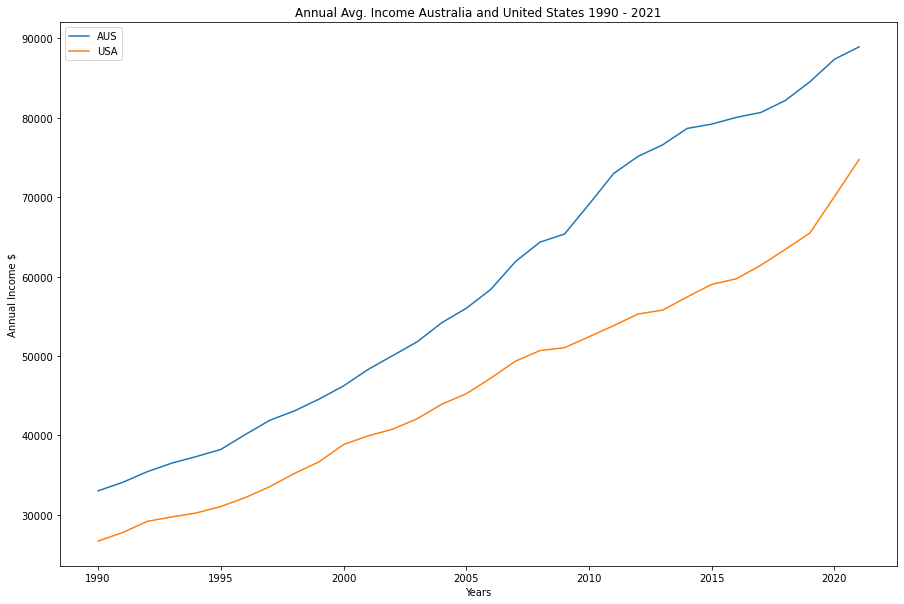

In [8]:
# Australia vs US Average wage growth

ax = au_df.plot(x='Time', y='Annual Wage(Avg.)', label='AUS', figsize = (15,10))
us_df.plot(ax=ax, x='Time', y='Annual Wage(Avg.)', label="USA" )
plt.ylabel('Annual Income $')
plt.xlabel('Years')
plt.title('Annual Avg. Income Australia and United States 1990 - 2021')
plt.legend()
plt.show()

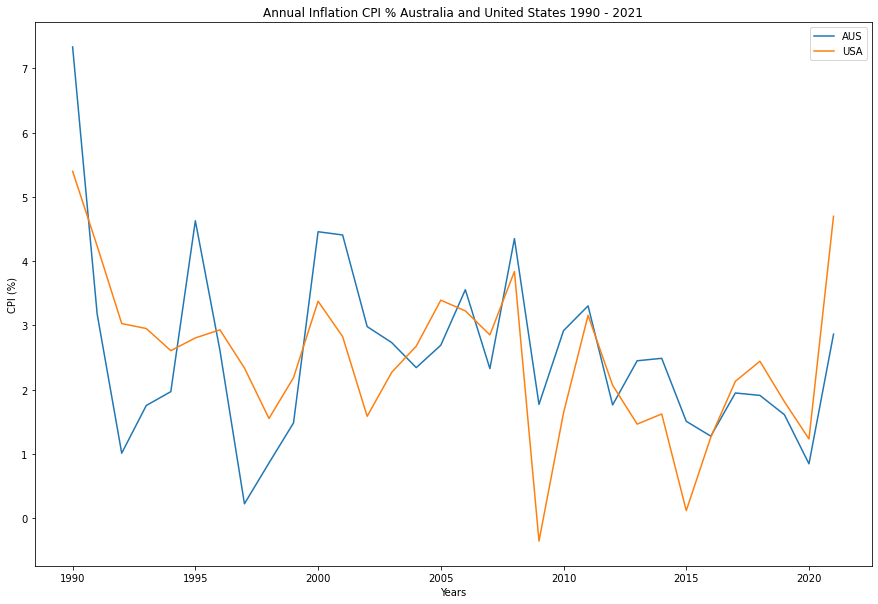

In [9]:
# Australia vs US CPI (Year-ended)

ax = au_df.plot(x='Time', y='CPI', label='AUS', figsize = (15,10))
us_df.plot(ax=ax, x='Time', y='CPI', label="USA" )
plt.ylabel('CPI (%)')
plt.xlabel('Years')
plt.title('Annual Inflation CPI % Australia and United States 1990 - 2021')
plt.legend()
plt.show()


Text(0, 0.5, 'CPI Cumulative')

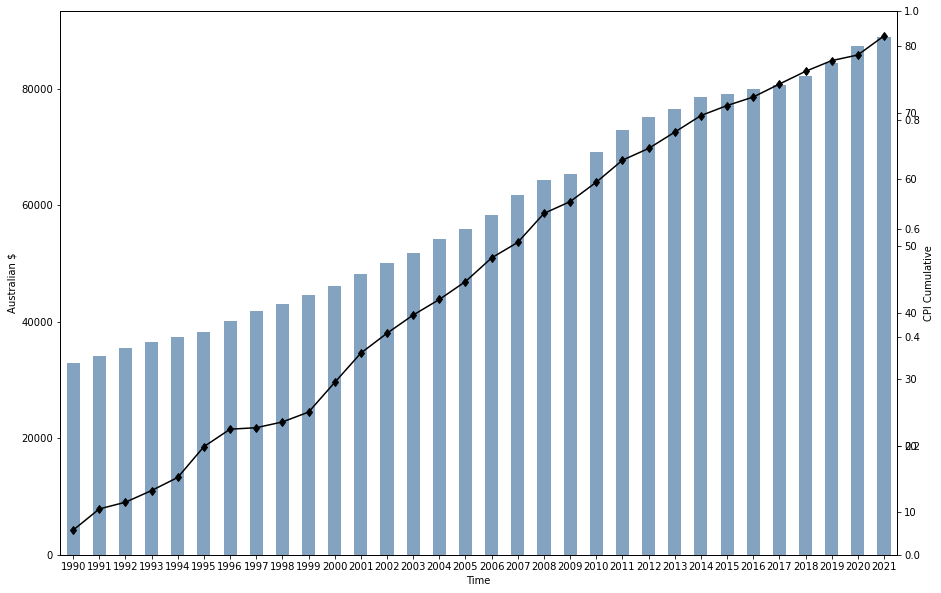

In [12]:
# Australia CPI vs Income

# x_axis = au_df["Time"]
# tick_locations = [value for value in x_axis]

time_idx_df = au_df.set_index(au_df['Time'])

fig, ax1 = plt.subplots(figsize = (15,10))
time_idx_df['Annual Wage(Avg.)'].plot(kind = 'bar', color=(0.2, 0.4, 0.6, 0.6))
au_df['CPI Cumulative'].plot(kind='line', marker='d', secondary_y=True, color='black')
ax2 = ax1.twinx()
ax1.set_ylabel('Australian $')
ax2.set_ylabel('CPI Cumulative')

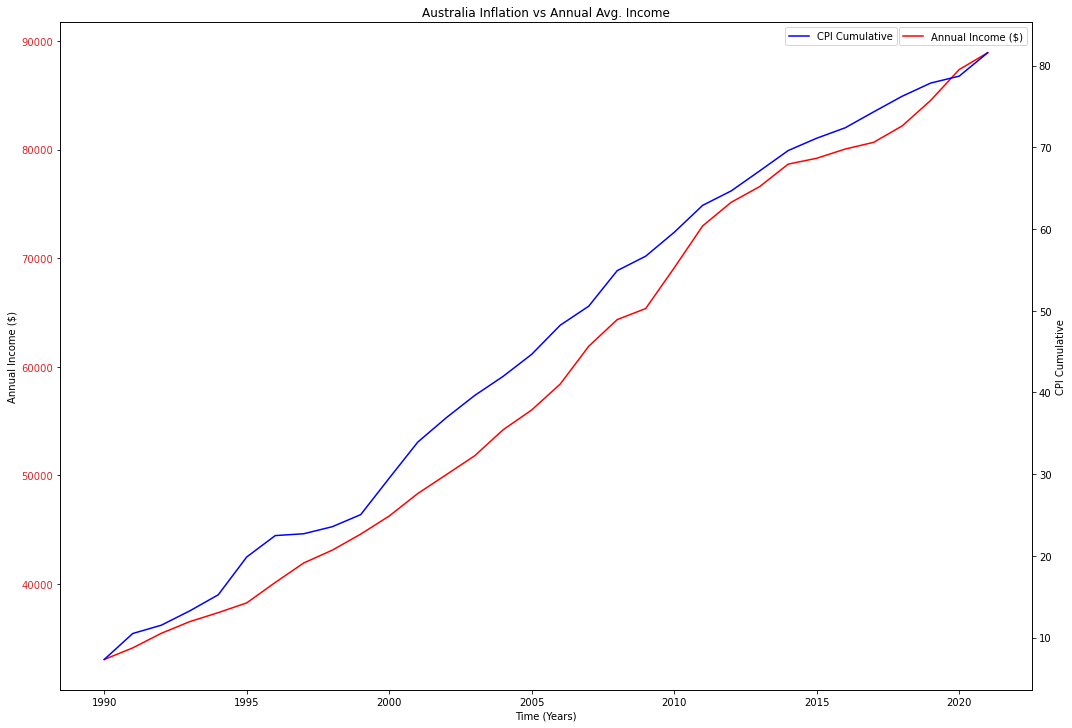

In [14]:
# Australia CPI vs Income

y2 = au_df["CPI Cumulative"]
x2 = au_df["Annual Wage(Avg.)"]
x1 = au_df["Time"]

fig, ax1 = plt.subplots(figsize = (15,10))

color = 'tab:red'

ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Annual Income ($)')
label1=['CPI Cumulative']
label2=['Annual Income ($)']


ax1.plot(x1, x2, color='r')

ax1.tick_params(axis='y', labelcolor=color)
plt.legend(label2, loc="best")


ax2 = ax1.twinx()

ax2.set_ylabel('CPI Cumulative')

ax2.plot(x1, y2, color='b')
ax2.tick_params(axis='y')
fig.tight_layout()
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('Australia Inflation vs Annual Avg. Income')
plt.show()

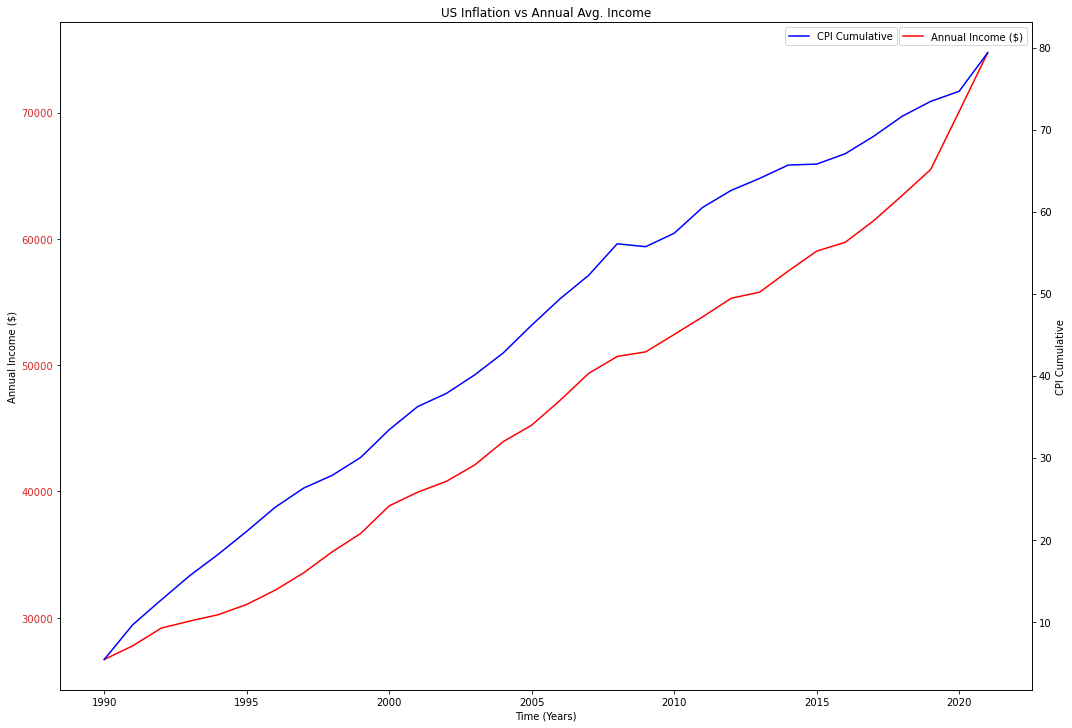

In [16]:
# US CPI vs Income

y2 = us_df["CPI Cumulative"]
x2 = us_df["Annual Wage(Avg.)"]
x1 = us_df["Time"]

fig, ax1 = plt.subplots(figsize = (15,10))

color = 'tab:red'

ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Annual Income ($)')
label1=['CPI Cumulative']
label2=['Annual Income ($)']


ax1.plot(x1, x2, color='r')

ax1.tick_params(axis='y', labelcolor=color)
plt.legend(label2, loc="best")


ax2 = ax1.twinx()

ax2.set_ylabel('CPI Cumulative')

ax2.plot(x1, y2, color='b')
ax2.tick_params(axis='y')
fig.tight_layout()
plt.legend(label1, loc="best", bbox_to_anchor=(0.866,0.9999))
plt.title('US Inflation vs Annual Avg. Income')
plt.show()

In [ ]:
# # bar chart

# x_axis = us_df["Time"]
# y_axis = us_df["Annual Wage(Avg.)"]
# y_axis_au = au_df["Annual Wage(Avg.)"]


# tick_locations = [value for value in x_axis]

# plt.figure(figsize=(20,12))
# bar1 = plt.bar(x_axis, y_axis, color = 'r')
# bar2 = plt.bar(x_axis, y_axis_au, color = 'b')
# plt.xticks(tick_locations)
# plt.xlabel("Year")
# plt.ylabel("Avg. Income ($)")
# plt.title("Annual Average Annual Income $")

In [ ]:
# # Australia CPI vs Aus Avg. Annual Wage

# ax = au_df.plot(kind = 'bar', figsize=(15,10), x='Time', y='CPI', label='CPI')
# au_df.plot(ax=ax, x='Time', y='Annual Wage(Avg.)', label="Annual Wage(Avg.)" )
# plt.yscale('log')
# plt.ylabel('Income')
# plt.xlabel('Years')
# plt.title('Annual Inflation vs Income | Australia 1990 - 2021')
# plt.legend()
# plt.show()